In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go


In [2]:
df = pd.read_csv('data.csv', sep=';')
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df["month"] = df["Date"].dt.month
df.drop(["Date", "Note", "Pointée", "Description", "Compte"], axis=1, inplace=True)
df.head()

,Montant,Catégorie,Sous-Catégorie,month
0,-22.52,Alimentation & Restau.,Supermarché / Epicerie,7
1,-9.99,Loisirs & Sorties,Divertissements,7
2,10.00,Entrées d'argent,Autres rentrées,6
3,-10.99,Dépenses pro,Services en ligne,6
4,-23.24,Loisirs & Sorties,Divertissements,6


## Clean dataframe 

In [3]:
df = df[df["Catégorie"] != "Entrées d'argent"]
df = df[df["Sous-Catégorie"] != "Virements internes"]
df = df[df["Sous-Catégorie"] != "Débit mensuel carte"]


## Mean over the months

Montant
month Catégorie                      
1     Banque                 -2051.63
      Loisirs & Sorties       -646.27
      Logement                -430.44
      Alimentation & Restau.  -352.88
      Achats & Shopping       -294.77
      Santé                    -77.07
      Auto & Transports        -52.62
      Abonnements              -50.98
      Divers                   -27.65
2     Banque                 -1051.63

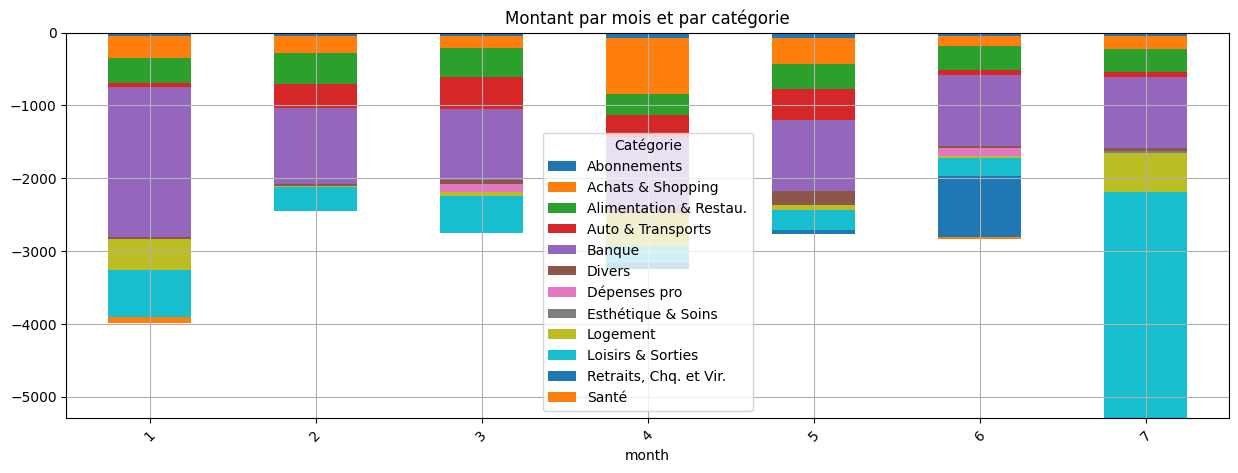

In [41]:
sum_df = df.drop(["Sous-Catégorie"], axis=1)
sum_df = sum_df.groupby(["month", "Catégorie"]).sum()
sum_df.sort_values(by=["month", "Montant"], ascending=True, inplace=True)
sum_df["Montant"].unstack(level=1).plot(
    figsize=(15, 5),
    kind='bar',
    stacked=True,
    grid=True,
    rot=45,
    label="Montant",
    title="Montant par mois et par catégorie"
)
sum_df.head(10)


In [4]:
sum_df = df.groupby(["Catégorie", "Sous-Catégorie", "month"]).sum()
sum_df = sum_df.groupby(["Catégorie", "Sous-Catégorie"]).sum()
# sum_df = sum_df.sort_values(by="Montant", ascending=True)
sum_df

Montant
Catégorie              Sous-Catégorie                     
Abonnements            Abonnements - Autres         -46.23
                       Internet                    -244.93
                       Téléphonie mobile           -111.93
Achats & Shopping      Achats & Shopping - Autres  -452.95
                       Articles de sport            -12.00
                       Cadeaux                     -251.46
                       Films & DVDs                 -33.98
                       Vêtements/Chaussures       -1361.42
Alimentation & Restau. Alimentation - Autres       -119.15
                       Café                         -73.80
                       Fast foods                  -491.42
                       Restaurants                 -472.80
                       Supermarché / Epicerie     -1300.49
Auto & Transports      Auto & Transports - Autres   -29.55
                       Billets d'avion              -97.98
                       Billets de train           -1322.00
                       Carburant                   -146.71
                       Location de véhicule         -55.88
                       Stationnement                 -5.75
                       Transports en commun         -41.10
Banque                 Epargne                     -150.00
                       Frais bancaires               -8.00
                       Remboursement emprunt      -7822.41
Divers                 A catégoriser               -216.15
                       Assurance                   -123.62
                       Autres dépenses               -9.99
                       Tabac                        -68.45
Dépenses pro           Frais d'expéditions           -6.13
                       Frais juridique             -110.63
                       Notes de frais               -75.40
                       Services en ligne            -41.23
Esthétique & Soins     Esthétique                   -28.17
Logement               Assurance habitation        -130.51
                       Charges diverses           -1268.73
                       Décoration                    -9.49
                       Electricité                 -157.65
Loisirs & Sorties      Bars / Clubs                -981.10
                       Divertissements             -221.00
                       Hôtels                       -24.00
                       Loisirs & Sorties - Autres  -119.33
                       Sortie au restaurant        -137.26
                       Sorties culturelles         -179.45
                       Sport                       -669.30
                       Voyages / Vacances         -3016.47
Retraits, Chq. et Vir. Retraits                    -970.00
Santé                  Pharmacie                    -29.90
                       Santé - Autres               -77.07

In [43]:
sum_df = sum_df.swaplevel().reset_index()

In [44]:
sum_df = sum_df[sum_df["Catégorie"] != "Entrées d'argent" ]
sum_df = sum_df[sum_df["Sous-Catégorie"] != "Virements internes"]

sum_df.head()


,Sous-Catégorie,Catégorie,Montant
0,Abonnements - Autres,Abonnements,-46.23
1,Internet,Abonnements,-244.93
2,Téléphonie mobile,Abonnements,-111.93
3,Achats & Shopping - Autres,Achats & Shopping,-452.95
4,Articles de sport,Achats & Shopping,-12.00


In [45]:
labels = ["Origin"] + list(sum_df["Catégorie"].unique()) + list(sum_df["Sous-Catégorie"].unique())
mapped_labels = {k: v for v, k in enumerate(labels)}


m_source, m_target, m_value = [], [], []

for line in sum_df.iterrows():
    m_source.append(0)
    m_target.append(mapped_labels[line[1]["Catégorie"]])
    m_value.append(abs(line[1]["Montant"]))
    
    m_source.append(mapped_labels[line[1]["Catégorie"]])
    m_target.append(mapped_labels[line[1]["Sous-Catégorie"]])
    m_value.append(-1 * line[1]["Montant"])
    # break



In [46]:
fig = go.Figure(
  data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "€",

    node = dict(
      pad = 15,
      thickness = 50,
      line = dict(color = "black", width = 0.5),
      label = labels,
      # color = "blue"
    ),
    link = dict(
      source = m_source,
      target = m_target,
      value = m_value
  ))])

fig.update_layout(
  title_text="Basic Sankey Diagram", 
  # autosize=False,
  font_size=15,
  width=1500,
  height=900,
  margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    )  
  )
fig.show()

# Filter over one month

In [47]:
# df = pd.read_csv('data.csv', sep=';')
# df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
# df["month"] = df["Date"].dt.month
# df.drop(["Date", "Note", "Pointée", "Compte"], axis=1, inplace=True)
# df.head()

In [48]:
filtered_df = df[df["month"] == 1]
filtered_df = filtered_df.drop(["month"], axis=1)
filtered_df["Montant"] = filtered_df["Montant"].apply(lambda x: abs(x))
filtered_df.head()

,Montant,Catégorie,Sous-Catégorie
39,15.00,Loisirs & Sorties,Divertissements
41,9.99,Divers,Autres dépenses
44,3.45,Achats & Shopping,Cadeaux
45,12.35,Auto & Transports,Auto & Transports - Autres
159,75.00,Banque,Epargne


In [49]:
# filtered_df[filtered_df["Catégorie"] == "Banque"]
# filtered_df[to_plot["Sous-Catégorie"] == "Débit mensuel carte"]


### Pie chart

,Montant
Catégorie,
Banque,2051.63
Loisirs & Sorties,646.27
Logement,430.44
Alimentation & Restau.,352.88
Achats & Shopping,294.77
Santé,77.07
Auto & Transports,52.62
Abonnements,50.98
Divers,27.65


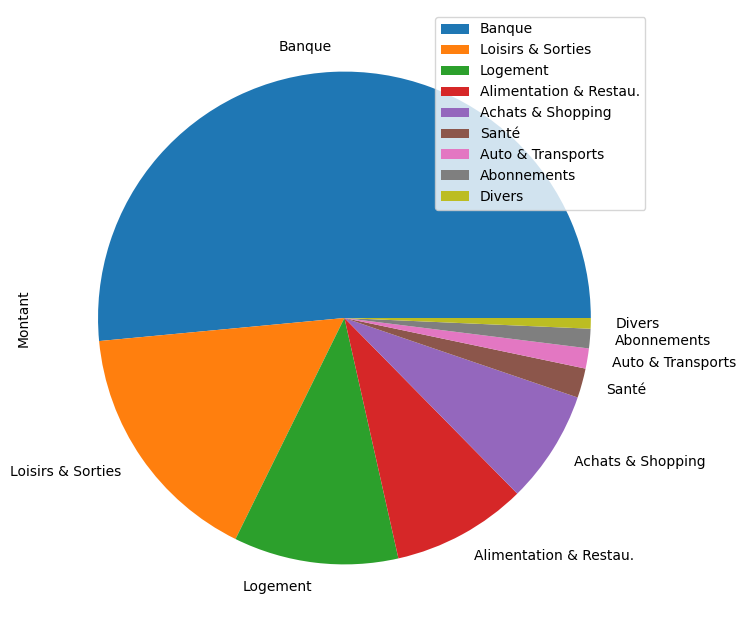

In [50]:
df_cat = filtered_df.drop(["Sous-Catégorie"], axis=1)
df_cat = df_cat.groupby(["Catégorie"]).sum()
df_cat = df_cat.sort_values(by="Montant", ascending=False)

df_cat.plot.pie(
    y="Montant",
    figsize=(8, 8),
)

df_cat

### Table on all sub category

In [51]:
grouped_df = filtered_df.groupby(["Catégorie", "Sous-Catégorie"]).sum()
grouped_df

Montant
Catégorie              Sous-Catégorie                     
Abonnements            Internet                      34.99
                       Téléphonie mobile             15.99
Achats & Shopping      Achats & Shopping - Autres   203.36
                       Cadeaux                       91.41
Alimentation & Restau. Alimentation - Autres          7.50
                       Café                           6.60
                       Fast foods                    88.40
                       Restaurants                   55.68
                       Supermarché / Epicerie       194.70
Auto & Transports      Auto & Transports - Autres    12.35
                       Carburant                     40.27
Banque                 Epargne                       75.00
                       Frais bancaires                2.00
                       Remboursement emprunt       1974.63
Divers                 Assurance                     17.66
                       Autres dépenses                9.99
Logement               Assurance habitation          16.50
                       Charges diverses             376.98
                       Electricité                   36.96
Loisirs & Sorties      Bars / Clubs                  59.50
                       Divertissements               15.00
                       Sortie au restaurant          75.57
                       Sport                        479.90
                       Voyages / Vacances            16.30
Santé                  Santé - Autres                77.07

In [52]:
filtered_df.head()

,Montant,Catégorie,Sous-Catégorie
39,15.00,Loisirs & Sorties,Divertissements
41,9.99,Divers,Autres dépenses
44,3.45,Achats & Shopping,Cadeaux
45,12.35,Auto & Transports,Auto & Transports - Autres
159,75.00,Banque,Epargne


## Plot sankey diagram for one month

In [61]:
# grouped_df.swaplevel().reset_index()
to_plot = grouped_df.swaplevel().reset_index()
to_plot

,Sous-Catégorie,Catégorie,Montant
0,Internet,Abonnements,34.99
1,Téléphonie mobile,Abonnements,15.99
2,Achats & Shopping - Autres,Achats & Shopping,203.36
3,Cadeaux,Achats & Shopping,91.41
4,Alimentation - Autres,Alimentation & Restau.,7.50
5,Café,Alimentation & Restau.,6.60
6,Fast foods,Alimentation & Restau.,88.40
7,Restaurants,Alimentation & Restau.,55.68
8,Supermarché / Epicerie,Alimentation & Restau.,194.70
9,Auto & Transports - Autres,Auto & Transports,12.35


In [68]:
labels = ["Origin"] + list(to_plot["Catégorie"].unique()) + list(to_plot["Sous-Catégorie"].unique())
mapped_labels = {k: v for v, k in enumerate(labels)}

m_source, m_target, m_value = [], [], []

for line in to_plot.iterrows():
    m_source.append(0)
    m_target.append(mapped_labels[line[1]["Catégorie"]])
    m_value.append(line[1]["Montant"])
    
    m_source.append(mapped_labels[line[1]["Catégorie"]])
    m_target.append(mapped_labels[line[1]["Sous-Catégorie"]])
    m_value.append(line[1]["Montant"])
    # break

# print(m_source, m_target, m_value)

In [67]:
fig = go.Figure(
  data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "€",

    node = dict(
      pad = 15,
      thickness = 50,
      line = dict(color = "black", width = 0.5),
      label = labels,
      # color = "blue"
    ),
    link = dict(
      source = m_source,
      target = m_target,
      value = m_value
  ))])

fig.update_layout(
  title_text="Basic Sankey Diagram", 
  # autosize=False,
  font_size=15,
  width=1500,
  height=900,
  margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    )  
  )
fig.show()